# Twitter_Sentiment_Classification Airline

In [56]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
# Loading data into pandas dataframe
# data = pd.read_csv("Tweets.csv")

from google.colab import drive
drive.mount('/content/drive')
# Load dataset.
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Batch 3/Session 26 PD/Tweets.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data.shape                                               # print shape of data.

(14640, 15)

In [5]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Function to create labeled barplots**

####**Percentage of tweets for each airline**

---



<Axes: xlabel='airline', ylabel='count'>

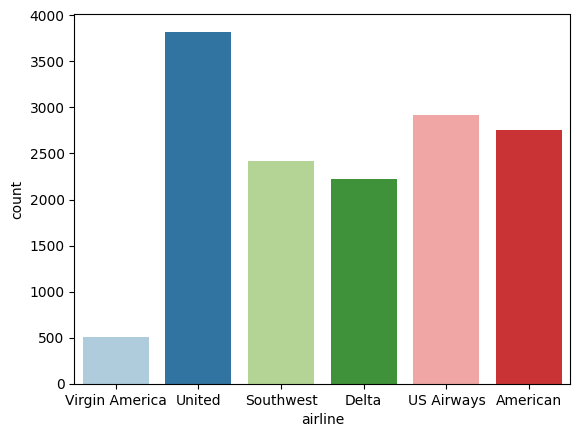

In [7]:
sns.countplot(
        data=data,
        x="airline",
        palette="Paired"
    )

 - **We can see the percentage of tweets for United Airline has the highest number of tweets i.e. 26%, followed by US Airways (20%)**.

###**Distribution of sentiments across all the tweets**

<Axes: xlabel='airline_sentiment', ylabel='count'>

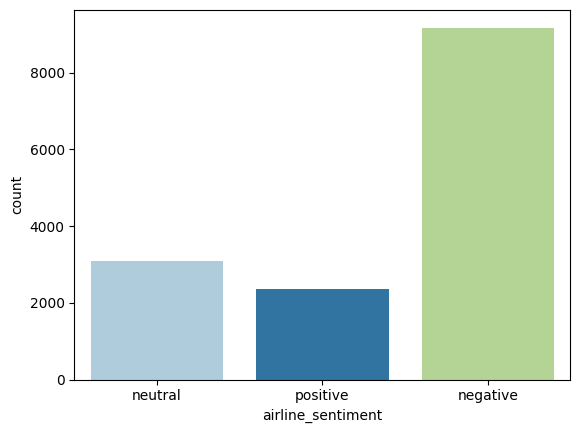

In [8]:
sns.countplot(
        data=data,
        x="airline_sentiment",
        palette="Paired"
    )

- **Majority of the tweets are negative (63%), followed by neutral tweets (21%), and then the positive tweets (16%).**





###**Distribution of Sentiment of tweets for each airline**

<Axes: xlabel='airline'>

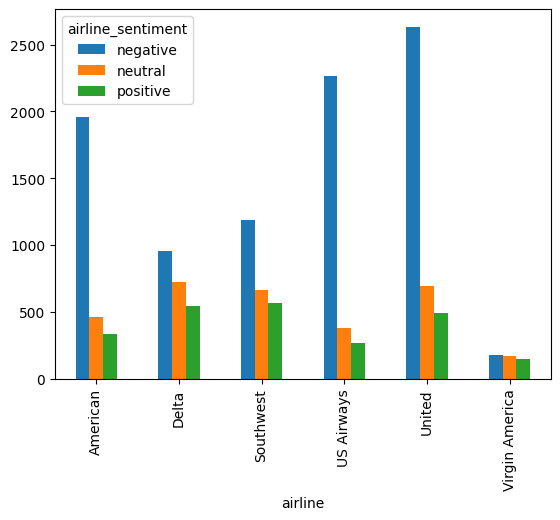

In [9]:
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

- **It is evident from the output that for almost all the airlines, the majority of the tweets are negative, followed by neutral and positive tweets. Virgin America is probably the only airline where the ratio of the three sentiments is somewhat similar.**

### **Plot of all the negative reasons**

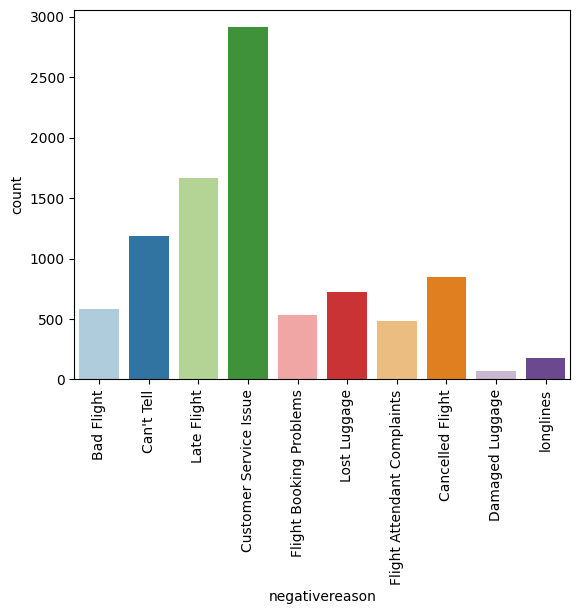

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(data=data, x="negativereason", palette="Paired")

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()


### **Word Cloud for the negative Tweets**

In [11]:
from wordcloud import WordCloud,STOPWORDS


In [12]:
airline_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('&')
                                and not word.startswith(':')
                                and word != 'RT'

                            ])
cleaned_word

'What said. plus you\'ve added commercials to the experience... tacky. I didn\'t today... Must mean I need to take another trip! it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA yes, nearly every time I fly VX this “ear worm” won’t go away Really missed a prime opportunity for Men Without Hats parody, there. Well, I didn\'t…but NOW I DO! it was amazing, and arrived an hour early. You\'re too good to me. did you know that suicide is the second leading cause of death among teens 10-24 I pretty graphics. so much better than minimal iconography. This is such a great deal! Already thinking about my 2nd trip to I haven\'t even gone on my 1st trip yet! ;p I\'m flying your #fabulous #Seductive skies again! U take all the #stress away from travel Thanks! SFO-PDX schedule is 

In [13]:
len(cleaned_word)

1318949

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

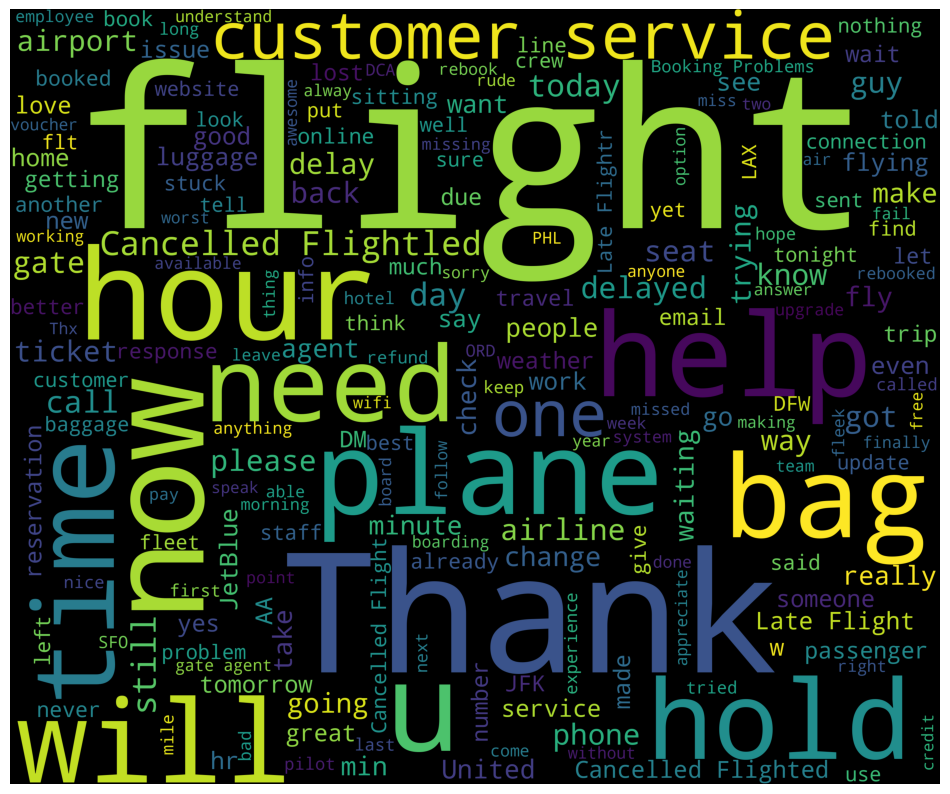

In [15]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- **Tweets with negative sentiment are frequently involved few words like cancelled, customer, hour, flight. People might guess that customer tends to complain when they are waiting for the delayed flights.**

### **Wordcloud for positive reasons**

In [16]:
airline_tweets=data[data['airline_sentiment']=='positive']
words = ' '.join(data['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('&')
                                and not word.startswith(':')
                                and word != 'RT'
                            ])

In [17]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

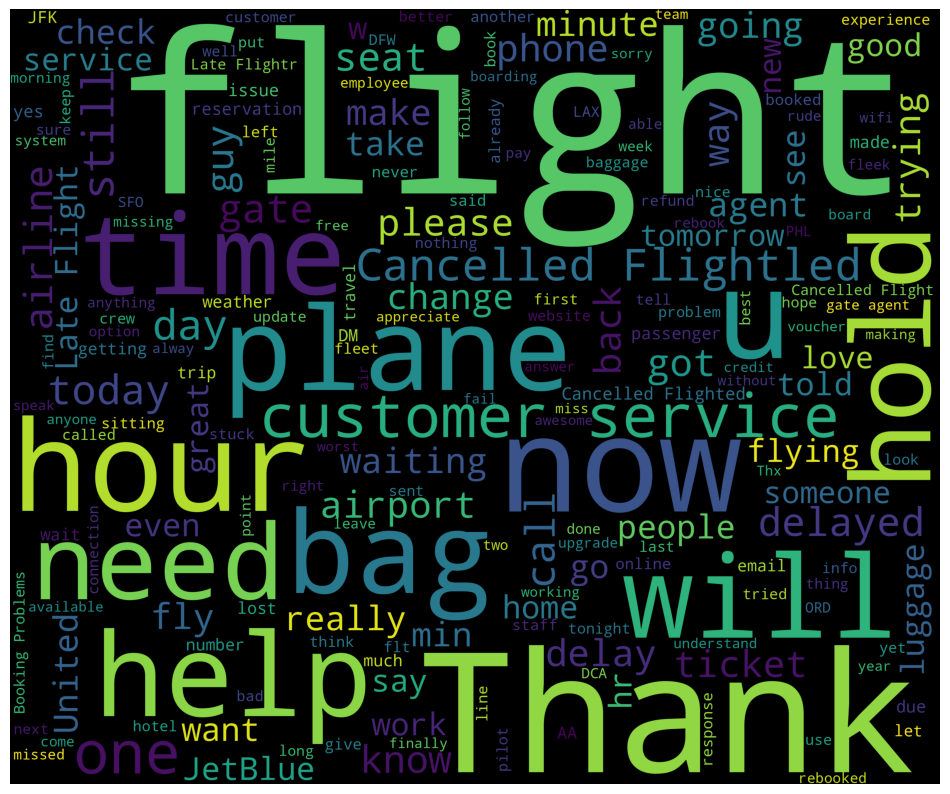

In [18]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [45]:
data = data[['text', 'airline_sentiment']]

In [20]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [21]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [22]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

#**Data Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [46]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

<ipython-input-46-17072d845af4>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [47]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [48]:
data.tail(10)

,text,airline_sentiment
14630,@AmericanAir Thanks! He is.,positive
14631,@AmericanAir thanks for nothing on getting us out of the country and back to US. Broken plane? Come on. Get another one.,negative
14632,"“@AmericanAir: @TilleyMonsta George, that does not look good. Please follow this link to start the refund process: http://t.co/4gr39s91Dl”😂",neutral
14633,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.",negative
14634,@AmericanAir right on cue with the delays👌,negative
14635,@AmericanAir thank you we got on a different flight to Chicago.,positive
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That is called shitty customer svc,negative
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,neutral
14638,"@AmericanAir you have my money, you change my flight, and do not answer your phones! Any other suggestions so I can make my commitment??",negative
14639,@AmericanAir we have 8 people so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,neutral


In [49]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.tail(10)

,text,airline_sentiment
14630,@AmericanAir Thanks! He is.,positive
14631,@AmericanAir thanks for nothing on getting us out of the country and back to US. Broken plane? Come on. Get another one.,negative
14632,"“@AmericanAir: @TilleyMonsta George, that does not look good. Please follow this link to start the refund process: http://t.co/grsDl”😂",neutral
14633,"@AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.",negative
14634,@AmericanAir right on cue with the delays👌,negative
14635,@AmericanAir thank you we got on a different flight to Chicago.,positive
14636,@AmericanAir leaving over minutes Late Flight. No warnings or communication until we were minutes Late Flight. That is called shitty customer svc,negative
14637,@AmericanAir Please bring American Airlines to #BlackBerry,neutral
14638,"@AmericanAir you have my money, you change my flight, and do not answer your phones! Any other suggestions so I can make my commitment??",negative
14639,@AmericanAir we have people so we need know how many seats are on the next flight. Plz put us on standby for people on the next flight?,neutral


In [50]:
data["text"][0]

'@VirginAmerica What @dhepburn said.'

In [51]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [52]:
data.head()                                                                    # Look at how tokenized data looks.

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [57]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [61]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


In [62]:
data.tail(10)

,text,airline_sentiment
14630,americanair thank,positive
14631,americanair thank nothing get us country back us break plane come get another one,negative
14632,americanair tilleymonsta george not look good please follow link start refund process http tcogrsdl,neutral
14633,americanair flight cancel flightled leave tomorrow morning auto rebooked tuesday night flight need arrive monday,negative
14634,americanair right cue delay,negative
14635,americanair thank get different flight chicago,positive
14636,americanair leave minutes late flight warn communication minutes late flight call shitty customer svc,negative
14637,americanair please bring american airlines blackberry,neutral
14638,americanair money change flight not answer phone suggestions make commitment,negative
14639,americanair people need know many seat next flight plz put us standby people next flight,neutral


###**Building the model based on countvectorizer and Random forest**

In [63]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [64]:
data_features.shape

(14640, 5000)

In [65]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
X = data_features

y = data.airline_sentiment

In [67]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.71448087431694


**Optimize the parameter:The number of trees in the random forest model(n_estimators)**

In [69]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [70]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

In [72]:
cv_scores

[0.6425648680498519,
 0.6860856336821055,
 0.7042354033496412,
 0.7170184623076098,
 0.7214088966658335,
 0.7259944529752764,
 0.7290184146936637,
 0.7370210810746467,
 0.7371193086455022,
 0.7404368579556954,
 0.7446321227487531,
 0.742388267923675,
 0.7421937649537549,
 0.7456085419419348,
 0.7508776916758919,
 0.745219155090526,
 0.7506830458641336,
 0.7468766917830232,
 0.750389458272328,
 0.7490234141580069,
 0.7487300170219857,
 0.7513653060981562,
 0.7479510052494376,
 0.7548784534990298]

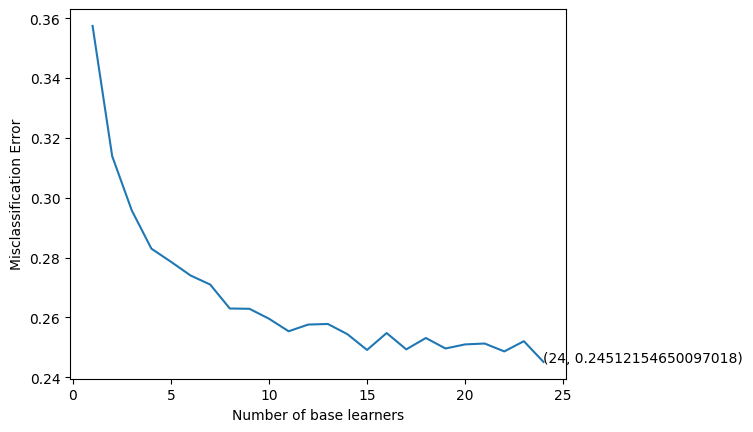

In [73]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [74]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = 24)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7704918032786885

In [75]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[2545  199   70]
 [ 400  409   75]
 [ 195  111  388]]


<Axes: >

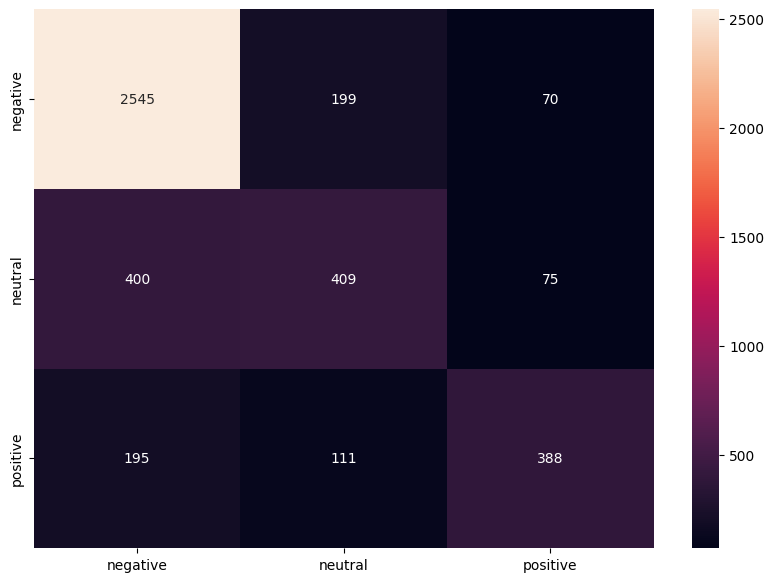

In [76]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')